In [38]:
import sys
sys.path.append('C:/Users/jangj/anaconda3/envs/tf/Lib/site-packages')
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import load_model

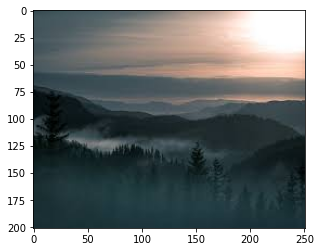

In [39]:
#im = cv2.imread('fire_dataset/fire/fire.757.png')
im = cv2.imread('fire_dataset/non_fire/non_fire.687.png')
im_cvt = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#이미지 출력
plt.imshow(im_cvt)
plt.show()

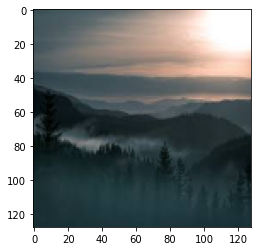

In [40]:
im_res = cv2.resize(im_cvt, (128,128)) #사이즈 조정
#im_res = cv2.GaussianBlur(im_res,(3,3),0)
plt.imshow(im_res)
plt.show()

In [41]:
im_arr = im_res.reshape(-1,128,128,3) / 255
#print(im_arr)

In [42]:
model = load_model('save/model-fire-whole.h5')

In [43]:
labels = ["fire","non_fire","non2_fire"]

In [44]:
r = model.predict(im_arr, batch_size=64, verbose=1)
#r
res = r[0]
print(res)

1/1 [==============================] - 0s 133ms/step
[0.34873995 0.43366593 0.21759415]


In [45]:
print(res[0]) #fire img percent

0.34873995


In [46]:
print(res[1]) #non_fire img percent

0.43366593


In [47]:
print(res[2]) #non2_fire img percent

0.21759415


In [48]:
for i, acc in enumerate(res) :
    print(labels[i], "=", int(acc*100))
print("---")
print("예측한 결과 = " , labels[res.argmax()])

fire = 34
non_fire = 43
non2_fire = 21
---
예측한 결과 =  non_fire
